# This script produces ordinal synthetic data

#### Based on this website:
#### https://stackabuse.com/generating-synthetic-data-with-numpy-and-scikit-learn/


## Importing dependencies

In [4]:
import numpy as np

# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt

# Needed for generating data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

## Define seed

In [5]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

## Sample from Dirichlet distribution 

In [6]:
#Using mthod 1 with gamma distribution
rand = np.random.RandomState(seed) 
distribution = 'Diriclet'
params = [a1,a2,a3,a4,a5,a6]
sample = [random.gammavariate(a, 1) for a in params]
sample = [v / sum(sample) for v in sample]
# Params is alpha is a vector (sequence of floats) with lenght K which is the number of categories which 
# we define as 6 due to the amount of answer possibilities

#https://en.wikipedia.org/wiki/Dirichlet_distribution#Random_number_generation


NameError: name 'a1' is not defined

In [25]:
#Using method 2 with np.random.dirichlet with beta samlping 
#Draw samples from the Dirichlet distribution
alpha = (10,5,3)
sample = np.random.dirichlet(alpha,size=20)
sample = sample.transpose()
#alpha input shape could be m*n
#default is size is K
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.dirichlet.html

print(np.shape(sample))


(3, 20)


Text(0.5, 1.0, 'Lengths of Strings')

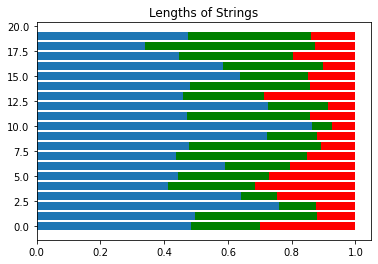

In [8]:
import matplotlib.pyplot as plt
plt.barh(range(20), sample[0])
plt.barh(range(20), sample[1], left=sample[0], color='g')
plt.barh(range(20), sample[2], left=sample[0]+sample[1], color='r')
plt.title("Lengths of Strings")

NameError: name 'dist_list' is not defined

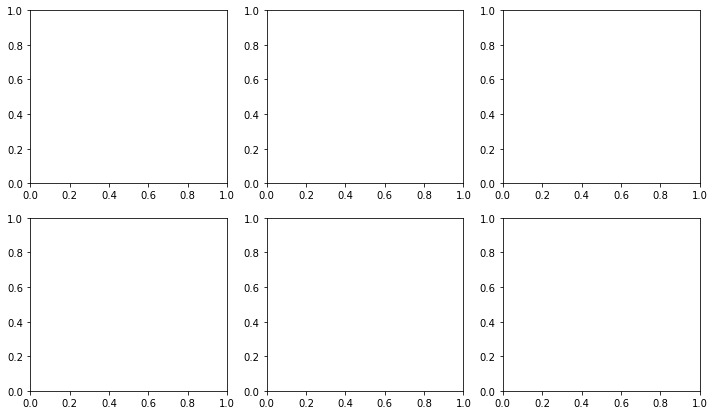

In [9]:
fig,ax = plt.subplots(nrows=2, ncols=3,figsize=(12,7))
plt_ind_list = np.arange(6)+231

for dist, plt_ind, param, colors in zip(dist_list, plt_ind_list, param_list, colors_list):
    x = eval('rand.'+dist+'('+param+',5000)') 
    
    plt.subplot(plt_ind)
    plt.hist(x,bins=50,color=colors)
    plt.title(dist)

fig.subplots_adjust(hspace=0.4,wspace=.3) 
plt.suptitle('Sampling from Various Distributions',fontsize=20)
plt.show()

## Here we work with the case where the possible answers on a likert scale a equally distributed and the parameter $\alpha$ for the dirichlet distribution is the $\textbf{1}$-vector

In [126]:
## Define constants
N = 1000 # number of respondents
M = 10 # number of questions
K = 5 # number of archetypes
p = 6 # length of likert scale

In [127]:
def synthetic_Z(M, K, p):
    
    betas = np.arange(1, p)
    alphas = np.empty(len(betas)-1)
    Z = np.empty((M, K))
    
    # Calculate beta-values
    betas = betas / sum(betas)
    
    # Calculate alpha-values
    for i in range(len(betas)):
        if i != (len(betas)-1):
            alphas[i] = (betas[i]+betas[i+1])/2
    
    
    # Draw samples from the alphas to construct Z
    
    for i in range(M):
        for j in range(K):
            Z[i,j] = np.random.choice(alphas, size=1)
    
    return Z 


def synthetic_A(N, K):
    #alpha = tuple(np.ceil(np.mean(Z, axis = 0)))
    alpha = np.ones(K)
    
    return np.random.dirichlet(alpha, size=N).transpose()
    
    

In [129]:
Z = synthetic_Z(M=M, K=K, p=12)


A = synthetic_A(N=N, K=K)


print(Z.shape)
print(A.shape)

print((Z@A).shape)


(10, 5)
(5, 1000)
(10, 1000)
